In [ ]:
pip install 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import data
data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

In [43]:
# Remove missing values
data = data1.dropna()

initial_row_count = len(data)

# Deleting rows where 'Age' is less than 18
deleted_rows = data[data['age'] < 18]
data = data[data['age'] >= 18]

# Counting rows after deletion
final_row_count = len(data)

# Counting the number of rows deleted
rows_deleted = initial_row_count - final_row_count

print(f"Rows deleted: {rows_deleted}")


Rows deleted: 13


In [44]:
print(data['Purchase_Categories'].unique())

['Beauty and Personal Care' 'Clothing and Fashion'
 'Groceries and Gourmet Food;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;others'
 'Beauty and Personal Care;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen'
 'Clothing and Fashion;Home and Kitchen' 'others'
 'Beauty and Personal Care;Home and Kitchen' 'Groceries and Gourmet Food'
 'Groceries and Gourmet Food;Clothing and Fashion;others'
 'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen'
 'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others'
 'Home and Kitchen' 'Beauty and Personal Care;others'
 'Clothing and Fashion;others'
 'Beauty and Personal Care;Home and Kitchen;others'
 'Home and Kitchen;others' 'Groceries and Gourmet Food;Home and Kitchen'
 'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others'
 'Groceries and Gourmet Food;Beauty and Personal Care;Home and Kitche

In [46]:
data = data[data['age'] >= 18]
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [10]:
# Normalize Recommendation_Helpfulness

# Function to map purchase frequency to a numeric value
def map_recommendation_helpfulness(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Recommendation_Helpfulness_Num'] = data['Recommendation_Helpfulness'].apply(map_recommendation_helpfulness)

# Normalize the new column
scaler = MinMaxScaler()
data['Recommendation_Helpfulness_Num'] = scaler.fit_transform(data[['Recommendation_Helpfulness_Num']])

print(data['Recommendation_Helpfulness'].unique())

['Yes' 'Sometimes' 'No']


In [11]:
data['Review_Reliability'].unique()
# Normalize Review_Reliability

# Function to map purchase frequency to a numeric value
def map_review_reliability(freq):
    mapping = {
        "Heavily": 5,
        "Moderately": 4,
        "Occasionally": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Review_Reliability_Num'] = data['Review_Reliability'].apply(map_review_reliability)

# Normalize the new column
scaler = MinMaxScaler()
data['Review_Reliability_Num'] = scaler.fit_transform(data[['Review_Reliability_Num']])

In [12]:
# Normalize purchase_frequency

# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Purchase_Frequency_Num'] = data['Purchase_Frequency'].apply(map_purchase_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Purchase_Frequency_Num'] = scaler.fit_transform(data[['Purchase_Frequency_Num']])

In [14]:
# Normalize Personalized_Recommendation_Frequency

# Function to map purchase frequency to a numeric value
def map_personalized_recommendation_frequency(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Personalized_Recommendation_Frequency_Num'] = data['Personalized_Recommendation_Frequency'].apply(map_personalized_recommendation_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Personalized_Recommendation_Frequency_Num'] = scaler.fit_transform(data[['Personalized_Recommendation_Frequency_Num']])

print(data['Personalized_Recommendation_Frequency'].unique())

['Yes' 'No' 'Sometimes']


In [16]:
# Normalize Browsing_Frequency

def map_browsing_Frequency(freq):
    mapping = {
        "Multiple times a day": 4,
        "Few times a week": 3,
        "Few times a month": 2,
        "Rarely": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Browsing_Frequency_Num'] = data['Browsing_Frequency'].apply(map_browsing_Frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Browsing_Frequency_Num'] = scaler.fit_transform(data[['Browsing_Frequency_Num']])

In [17]:
# Normalize Cart_Completion_Frequency
def map_cart_completion_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Cart_Completion_Frequency_Num'] = data['Cart_Completion_Frequency'].apply(map_cart_completion_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Completion_Frequency_Num'] = scaler.fit_transform(data[['Cart_Completion_Frequency_Num']])

In [18]:
# Normalize Saveforlater_Frequency
def map_saveforlater_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Saveforlater_Frequency_Num'] = data['Saveforlater_Frequency'].apply(map_saveforlater_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Saveforlater_Frequency_Num'] = scaler.fit_transform(data[['Saveforlater_Frequency_Num']])

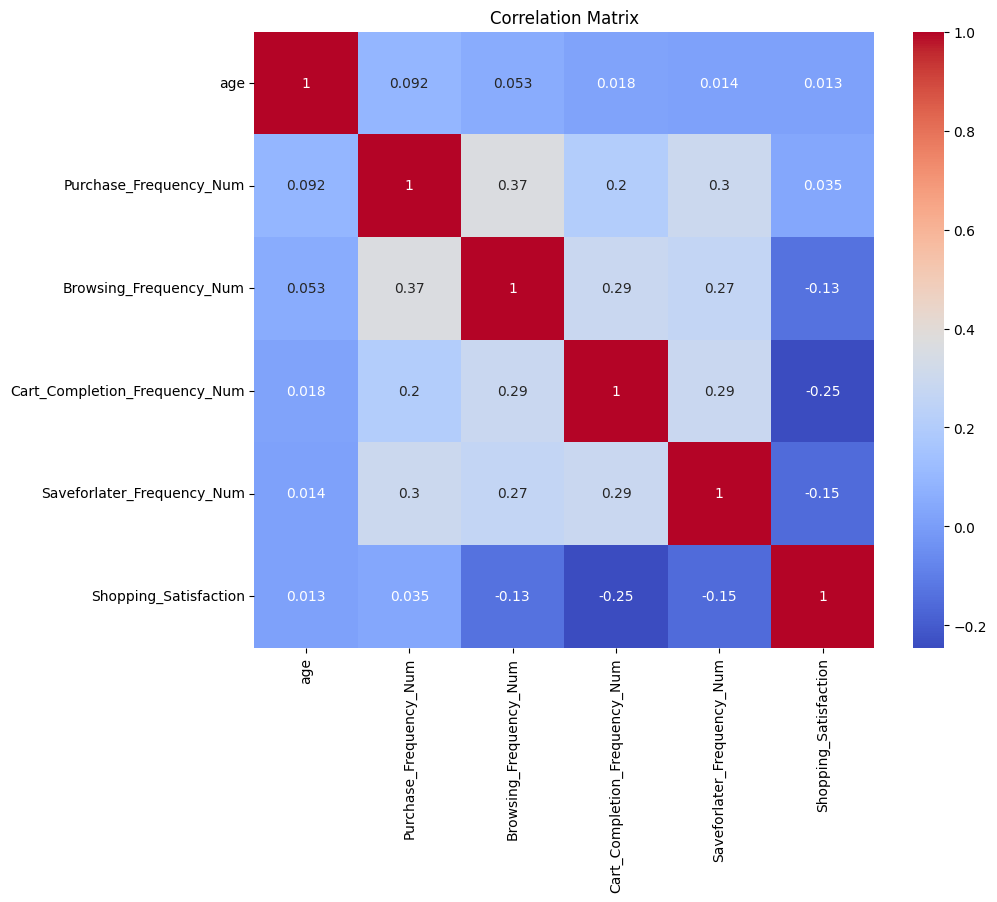

In [24]:
# Select relevant columns for correlation. For example:
selected_columns = ['age', 'Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Shopping_Satisfaction']  # add your selected columns

# Create the correlation matrix
correlation_matrix = data[selected_columns].corr(numeric_only = True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Define a threshold for high browsing frequency
high_browsing_threshold = 0.5  # This is arbitrary and can be adjusted based on your data distribution
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]
low_browsing_freq = data[data['Browsing_Frequency_Num'] <= high_browsing_threshold]

# Analyzing Purchase_Frequency based on Recommendation_Helpfulness within high browsing frequency segment
high_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] > high_browsing_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] <= high_browsing_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): {mean_purchase_high_recommend}")
print(f"Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): {mean_purchase_low_recommend}")


Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): 0.5327380952380952
Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): 0.528969957081545


In [20]:
# Still need to add the right Personalized Recommendation Frequency
# Segmenting based on Browsing Frequency
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]

# Further segmenting based on Personalized Recommendation Frequency
# (Assuming high recommendation frequency is represented by a higher numerical value)
high_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] > high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]
low_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] <= high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]

# Analyzing Purchase Frequency
high_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] > high_rec_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] <= high_rec_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend_high_rec = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend_high_rec = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): {mean_purchase_high_recommend_high_rec}")
print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): {mean_purchase_low_recommend_high_rec}")


Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): 0.5540540540540541
Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): 0.5590909090909091


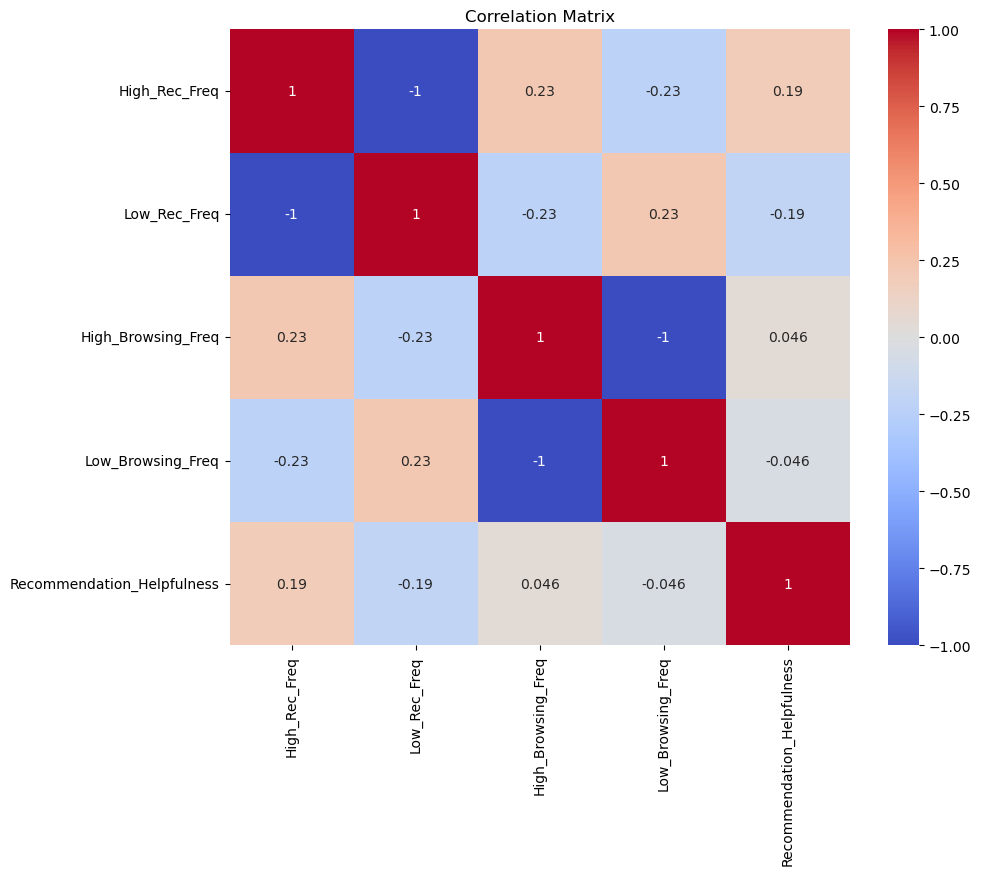

In [21]:
# Create a new DataFrame for the correlation analysis
correlation_data = pd.DataFrame()

# Assuming you have functions or logic to determine these segments
# Convert these segments into binary numerical values (1 for high, 0 for low)
correlation_data['High_Rec_Freq'] = data['Personalized_Recommendation_Frequency_Num'].apply(lambda x: 1 if x > data['Personalized_Recommendation_Frequency_Num'].median() else 0)
correlation_data['Low_Rec_Freq'] = 1 - correlation_data['High_Rec_Freq']
correlation_data['High_Browsing_Freq'] = data['Browsing_Frequency_Num'].apply(lambda x: 1 if x > high_browsing_threshold else 0)
correlation_data['Low_Browsing_Freq'] = 1 - correlation_data['High_Browsing_Freq']
correlation_data['Recommendation_Helpfulness'] = data['Recommendation_Helpfulness_Num']  # Assuming it's already numerical

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known

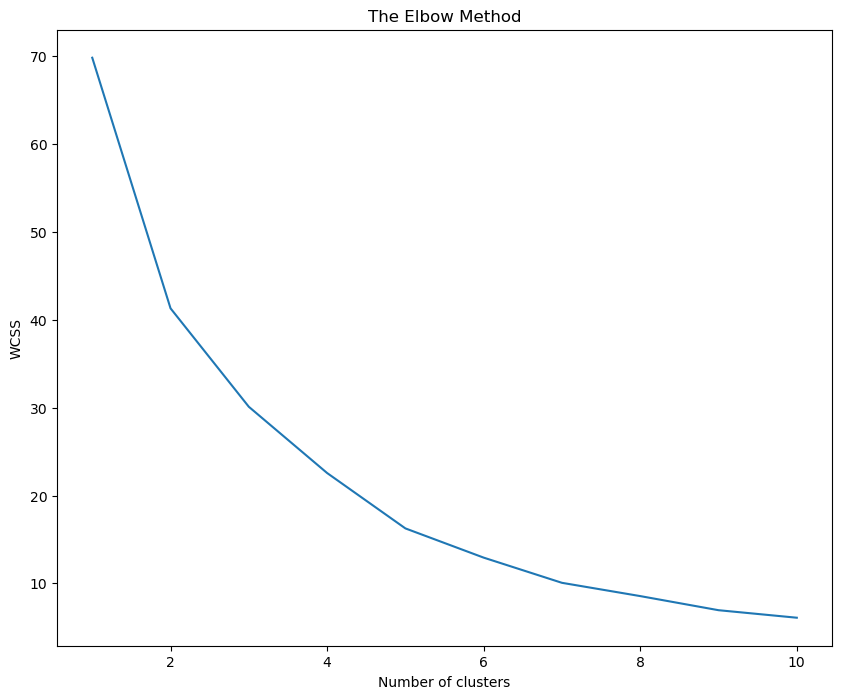

In [22]:
features = data[['Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num']]

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Adding the cluster labels to your original DataFrame
data['Cluster_Labels'] = cluster_labels

# Check the value counts for each cluster
print(data['Cluster_Labels'].value_counts())

# Optionally, you can also examine the cluster centers
print(kmeans.cluster_centers_)

C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0    253
1    198
2    136
Name: Cluster_Labels, dtype: int64
[[0.50395257 0.51185771]
 [0.68055556 0.80429293]
 [0.47610294 0.14522059]]


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'data' is your DataFrame and 'Purchase_Frequency' and 'Purchase_Categories' are categorical

# Encode categorical data
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_purchase_cat = LabelEncoder()
data['Purchase_Categories'] = le_purchase_cat.fit_transform(data['Purchase_Categories'])

# Normalize age
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])

# Feature selection for K-Means
features = data[['age', 'Gender', 'Purchase_Frequency_Num', 'Purchase_Categories']]

# Determine the number of clusters (k) using the Elbow method or Silhouette analysis (not shown here)
# For demonstration purposes, let's assume k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Assign the cluster labels to the original data
data['Cluster_Labels'] = kmeans.labels_

# Now you can analyze the clusters
print(data.groupby('Cluster_Labels').mean())


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


                     age    Gender  Purchase_Categories  \
Cluster_Labels                                            
0              -0.118191  0.672414             1.301724   
1               0.262300  0.807339            25.944954   
2              -0.004758  0.760163            10.475610   

                Customer_Reviews_Importance  \
Cluster_Labels                                
0                                  2.474138   
1                                  2.458716   
2                                  2.500000   

                Personalized_Recommendation_Frequency   Rating_Accuracy   \
Cluster_Labels                                                             
0                                             2.728448          2.698276   
1                                             2.623853          2.706422   
2                                             2.699187          2.613821   

                Shopping_Satisfaction  Recommendation_Helpfulness_Num  \
Cluster_Labels

C:\Users\Jakob Bannick\AppData\Local\Temp\ipykernel_41420\135940688.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Cluster_Labels').mean())


In [53]:
# Selecting features for clustering
X = data[['Purchase_Frequency_Num', 'Browsing_Frequency_Num']]

# Elbow Method to find the optimal number of clusters
wcss = []  # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means Clustering with the chosen number of clusters
k = 4  # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Adding cluster ID to the DataFrame
data['Cluster_ID'] = y_kmeans

KeyError: "None of [Index(['Purchase_Frequency_Num', 'Browsing_Frequency_Num'], dtype='object')] are in the [columns]"

In [48]:
# Gender groups
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust bins as needed
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [49]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Age_Group
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,18-30
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,18-30
2,2023/06/04 5:04:56 PM GMT+5:30,24,Neutral,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,18-30
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,18-30
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,18-30


C:\Users\Jakob Bannick\AppData\Local\Temp\ipykernel_41420\1219336282.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Gender', 'Age_Group']).sum()
C:\Users\Jakob Bannick\AppData\Local\Temp\ipykernel_41420\1219336282.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_Group', y='Count', hue='Gender', data=melted_data, ci=None)


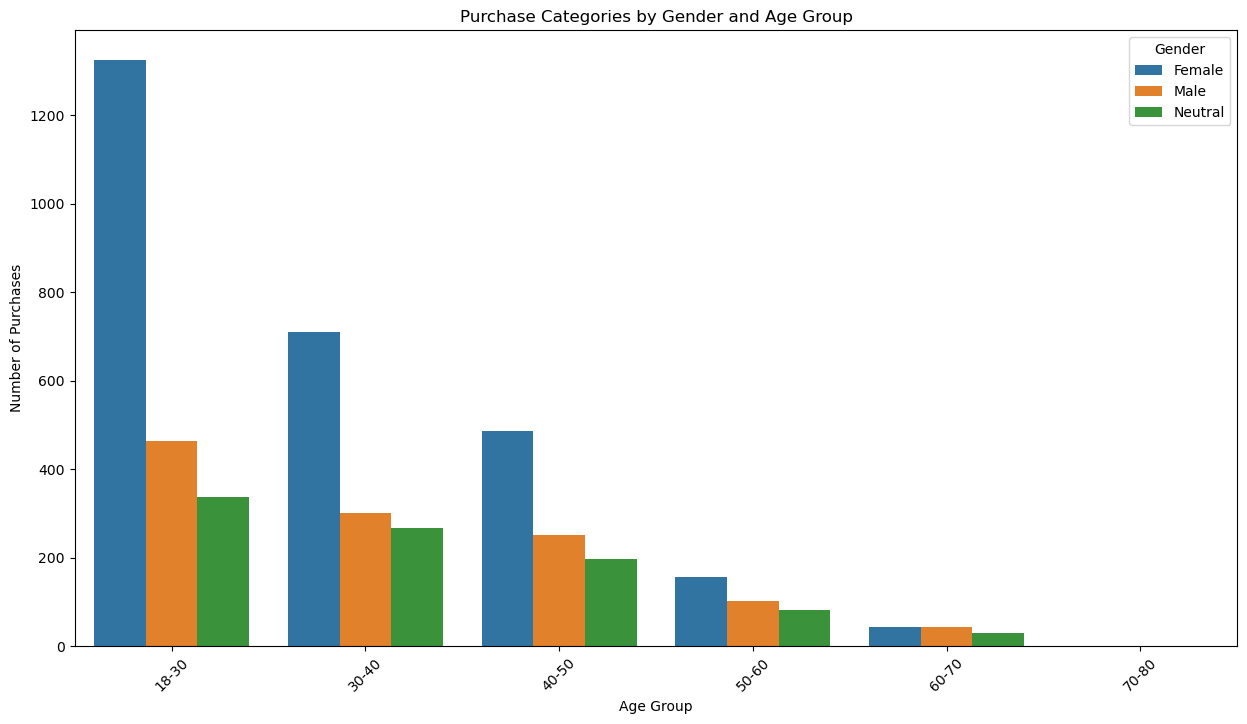

In [50]:
# Aggregate the data
grouped_data = data.groupby(['Gender', 'Age_Group']).sum()

# Reset index to make 'Gender' and 'Age_Group' columns again
grouped_data.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for a grouped bar plot
melted_data = pd.melt(grouped_data, id_vars=['Gender', 'Age_Group'], var_name='Purchase_Category', value_name='Count')

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Age_Group', y='Count', hue='Gender', data=melted_data, ci=None)

# Customize the plot
plt.title('Purchase Categories by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.show()

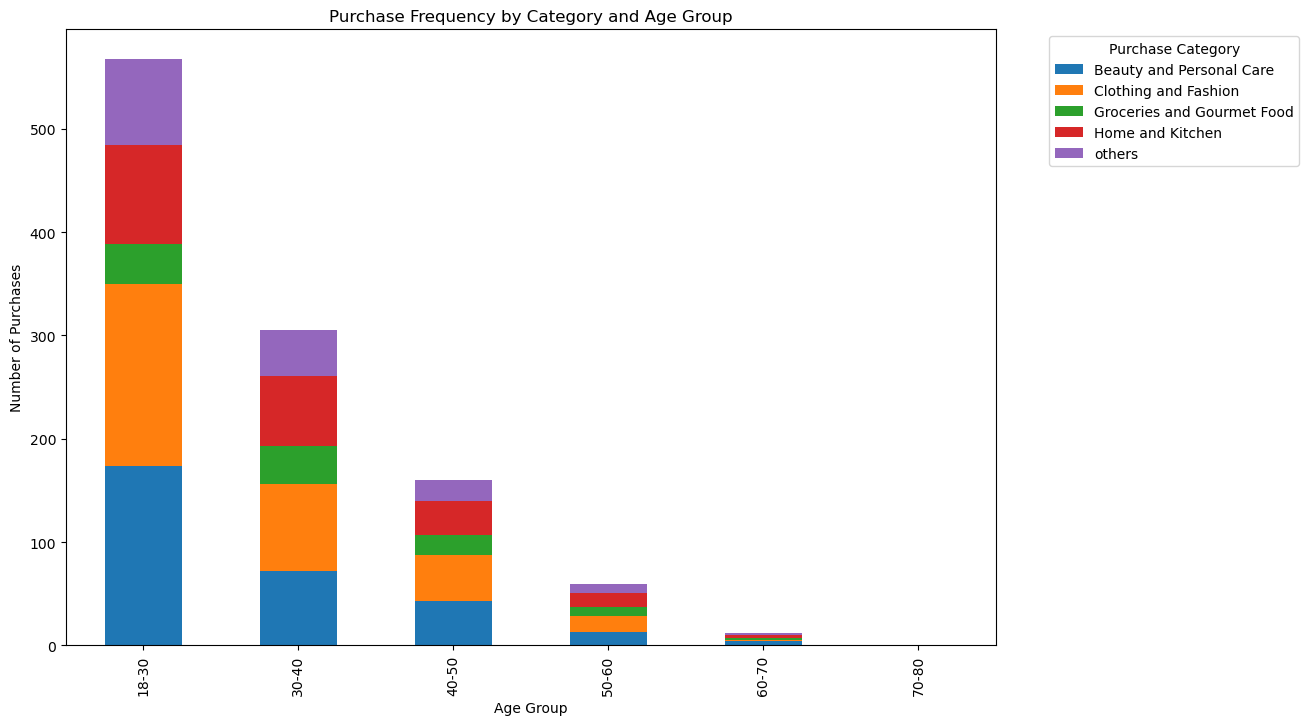

In [51]:
# Step 1: Split 'Purchase_Categories' into individual entries
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Group by 'Split_Category' and 'Age_Group' and count the number of occurrences
category_age_group_count = data_split.groupby(['Split_Category', 'Age_Group']).size().unstack(fill_value=0)

# Step 3: Visualize the Data
# Transpose the data so that age groups are on the x-axis
category_age_group_count = category_age_group_count.T

# Plotting
category_age_group_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.title('Purchase Frequency by Category and Age Group')
plt.legend(title='Purchase Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [52]:
# Define the markers for each gender
gender_markers = {'Male': '^', 'Female': 'o', 'Neutral': 's'}

# Create a scatter plot for each cluster and gender
for cluster_id in range(k):
    clustered_data = data[data['Cluster_ID'] == cluster_id]
    for gender, marker in gender_markers.items():
        gender_data = clustered_data[clustered_data['Gender'] == gender]
        plt.scatter(
            gender_data['Purchase_Frequency_Num'],
            gender_data['Browsing_Frequency_Num'],
            s=50,
            marker=marker,
            alpha=0.6,
            label=f'Cluster {cluster_id + 1} - {gender}' if gender_data.shape[0] > 0 else ""
        )

# Title and labels
plt.title('Clusters of Customers by Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Browsing Frequency')

# This ensures that each label is only added to the legend once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()



KeyError: 'Cluster_ID'

In [20]:
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Group by 'Split_Category' and 'Purchase_Frequency' and count the number of customers
category_freq_count = data_split.groupby(['Split_Category', 'Purchase_Frequency']).size().unstack(fill_value=0)

# Step 3: Visualize the Data
category_freq_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Purchase Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Purchase Frequency and Category')
plt.legend(title='Purchase Frequency')
plt.show()

AttributeError: Can only use .str accessor with string values!

In [21]:
# Ensure data_split is updated with the new 'Age_Group'
data_split = data.join(split_categories)  # Assuming split_categories is already defined

# Group by Gender, Age_Group, and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Age_Group', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index=['Gender', 'Age_Group'], columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender, Age Group, and Category')
plt.show()

NameError: name 'split_categories' is not defined

In [22]:
# Assuming 'data' is your DataFrame and 'data_split' has been prepared with 'Split_Category'

# Replace 'others' and 'Prefer not to say' in the Gender column
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Group by Gender and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index='Gender', columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender and Category')
plt.show()

NameError: name 'data_split' is not defined

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.24


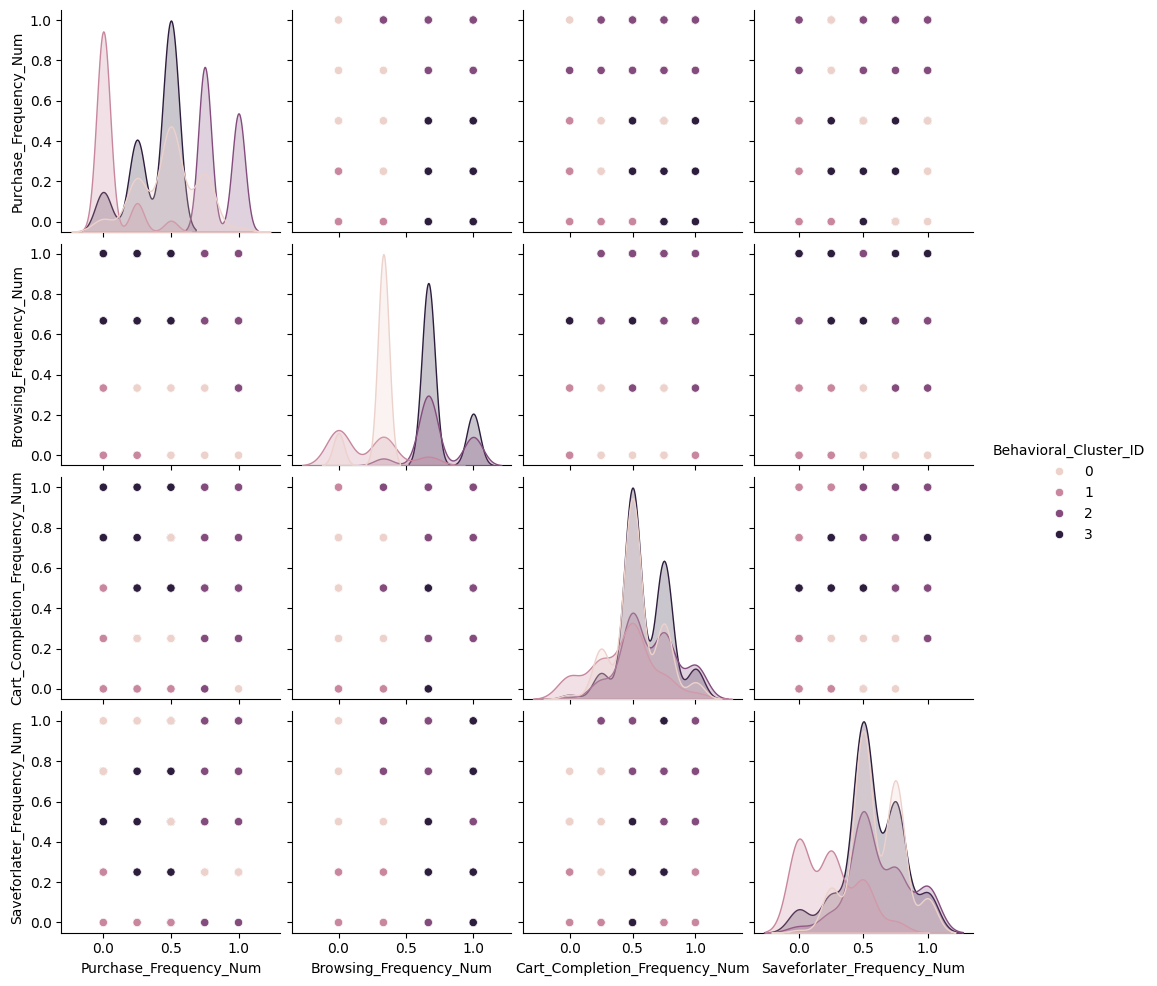

In [23]:
# Assuming data is your DataFrame and the columns have been appropriately preprocessed
X = data[['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num']]

# Elbow Method for optimal number of clusters
# ...

# Applying K-Means Clustering
k = 4  # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add cluster ID to the DataFrame
data['Behavioral_Cluster_ID'] = y_kmeans

# Pair Plot for visualization
sns.pairplot(data, vars=['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num'], hue='Behavioral_Cluster_ID')
plt.show()

### Decision Tree

In [154]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset into a Pandas DataFrame
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")


# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Assuming 'df' is your DataFrame
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

# Assuming 'df' is your DataFrame and 'Gender' column contains these values
gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.


In [144]:
df.head()
print(df['Shopping_Satisfaction'].unique())

[1 2 4 3 5]


Decision tree with features age & Gender (25% Accuracy)

In [145]:
# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
df['Purchase_Frequency_Num'] = df['Purchase_Frequency'].apply(map_purchase_frequency)
print("Separating features and target variable...")
X = df[['age', 'Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("Decision tree classifier created and fitted.")

# Parameters to tune
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [15, 16, 17, 18],
    'min_samples_split': [15, 16, 17],
    'min_samples_leaf': [14, 15, 16]
}
print("Parameters defined.")

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")

Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a decision tree classifier...
Decision tree classifier created and fitted.
Defining parameters to tune...
Parameters defined.
Finding the best parameters using GridSearchCV...


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 25.25%


In [137]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Frequency_Num
0,2023/06/04 1:28:19 PM GMT+5:30,23,1,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,3
1,2023/06/04 2:30:44 PM GMT+5:30,23,1,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2
3,2023/06/04 5:13:00 PM GMT+5:30,24,1,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2
4,2023/06/04 5:28:06 PM GMT+5:30,22,1,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,1
5,2023/06/04 6:01:59 PM GMT+5:30,21,1,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy,1


Decision tree with features age & Gender (22% Accuracy)

In [138]:
# Separating features and target variable
print("Separating features and target variable...")
X = df[['age','Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("Decision tree classifier created and fitted.")

# Parameters to tune
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
print("Parameters defined.")

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")

Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a decision tree classifier...
Decision tree classifier created and fitted.
Defining parameters to tune...
Parameters defined.
Finding the best parameters using GridSearchCV...


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 22.22%


In [152]:
# Assuming 'best_dt_classifier' is the trained Decision Tree Classifier

# Manually input age and gender
age = int(input("Enter age: "))
gender = input("Enter gender (M/F): ")

# Encode gender to numerical value
gender = 0 if gender.upper() == 'M' else 1

# Make prediction
predicted_category = best_dt_classifier.predict([[age, gender]])

print(f"Based on the input, the predicted purchase category is: {predicted_category[0]}")


Enter age: 29
Enter gender (M/F): M
Based on the input, the predicted purchase category is: Clothing and Fashion


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Function to convert gender to numerical value
def encode_gender(gender):
    return 0 if gender.upper() == 'M' else 1

# Run 5 tests with random age and gender inputs
for test_number in range(5):
    # Generate random age (you can replace this with your input method)
    age = 19 + test_number * 5  # Example: Start from 20 and increase by 5 for each test

    # Generate random gender (you can replace this with your input method)
    gender = 'M' if test_number % 2 == 0 else 'F'  # Example: Alternating between 'M' and 'F'

    # Encode gender
    encoded_gender = encode_gender(gender)

    # Predict purchase category
    predicted_category = dt_classifier.predict([[age, encoded_gender]])

    # Display input and predicted output
    print(f"Test {test_number + 1}: Input - Age: {age}, Gender: {gender}, Predicted Purchase Category: {predicted_category[0]}")


Test 1: Input - Age: 19, Gender: M, Predicted Purchase Category: Beauty and Personal Care;Clothing and Fashion
Test 2: Input - Age: 24, Gender: F, Predicted Purchase Category: others
Test 3: Input - Age: 29, Gender: M, Predicted Purchase Category: Clothing and Fashion
Test 4: Input - Age: 34, Gender: F, Predicted Purchase Category: Clothing and Fashion
Test 5: Input - Age: 39, Gender: M, Predicted Purchase Category: Home and Kitchen


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [148]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load your dataset into a Pandas DataFrame (Replace this with your dataset)
df = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Encoding categorical variables (convert Gender to numerical)
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Separating features and target variable
X = df[['age', 'Gender']]
y = df['Purchase_Categories']

# Create and fit the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Initialize a dictionary to store predicted categories and their counts
category_counts = {}

# Run 100 tests and store the predicted categories
for test_number in range(100):
    # Generate random age and gender (replace this with your input method)
    age = 20 + test_number  # Example: Incrementing age for each test
    gender = 'M' if test_number % 2 == 0 else 'F'  # Example: Alternating between 'M' and 'F'

    # Encode gender
    encoded_gender = 0 if gender == 'M' else 1

    # Predict purchase category
    predicted_category = dt_classifier.predict([[age, encoded_gender]])

    # Split categories by ';'
    categories = predicted_category[0].split(';')

    # Store the predicted categories and count occurrences
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

# Display insights from the test results
print("Insights from 100 tests:")
print("Predicted Purchase Categories and their Frequencies:")
for category, count in category_counts.items():
    print(f"Category: {category.strip()}, Count: {count}")

# Find the most frequent predicted purchase category
most_frequent_category = max(category_counts, key=category_counts.get)
print(f"\nThe most frequent predicted purchase category is: {most_frequent_category.strip()} (Count: {category_counts[most_frequent_category]})")


Insights from 100 tests:
Predicted Purchase Categories and their Frequencies:
Category: Beauty and Personal Care, Count: 80
Category: Clothing and Fashion, Count: 21
Category: others, Count: 12
Category: Groceries and Gourmet Food, Count: 11
Category: Home and Kitchen, Count: 16

The most frequent predicted purchase category is: Beauty and Personal Care (Count: 80)


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jakob Banni

### RANDOM FOREST

In [155]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Load your dataset into a Pandas DataFrame
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

# Assuming 'df' is your DataFrame and 'Gender' column contains these values
gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Prefer not to say': 2, 'Others': 3})
print("Categorical variables encoded.")

# Separating features and target variable
print("Separating features and target variable...")
X = df[['age', 'Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')  # Use any strategy: mean, median, most_frequent
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a RandomForestClassifier
print("Creating a Random Forest classifier...")
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print("Random Forest classifier created and fitted.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = rf_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest classifier: {accuracy * 100:.2f}%")



Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
Encoding categorical variables...
Categorical variables encoded.
Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a Random Forest classifier...
Random Forest classifier created and fitted.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the Random Forest classifier: 18.18%


C:\Users\Jakob Bannick\anaconda3\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### NEW TREE OUTCOME - More features (now 40.49%)

In [173]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset into a Pandas DataFrame
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

# Assuming 'df' is your DataFrame and 'Gender' column contains these values
gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

# Perform one-hot encoding for Purchase_Categories
print("Performing one-hot encoding for Purchase_Categories...")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

# Separating features and target variable
print("Separating features and target variable...")
X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Defining parameters to tune
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Parameters defined.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")


Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
Performing one-hot encoding for Purchase_Categories...
One-hot encoding completed for Purchase_Categories.
Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Defining parameters to tune...
Parameters defined.
Creating a decision tree classifier...
Finding the best parameters using GridSearchCV...
Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 40.40%


### Gradient Boosting (41.41%)

In [171]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Load your dataset into a Pandas DataFrame
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

# Assuming 'df' is your DataFrame and 'Gender' column contains these values
gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

param_grid = {
    'max_depth': [20, 40, 70],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 40]
}
print("Parameters defined.")

gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

best_params = grid_search.best_params_
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

print("Predicting on the test set...")
y_pred = best_gb_classifier.predict(X_test)


print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Gradient Boosting classifier: {accuracy * 100:.2f}%")


Dataset loaded successfully.
Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
One-hot encoding completed for Purchase_Categories.
Features and target variable separated.
Dataset split completed.
Parameters defined.
Best parameters found using GridSearchCV.
Model fitted with the best parameters.
Predicting on the test set...
Calculating accuracy...
Accuracy of the tuned Gradient Boosting classifier: 42.42%


### Random forest 2.0 

In [170]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Load your dataset into a Pandas DataFrame
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]
# Assuming 'df' is your DataFrame and 'Gender' column contains these values
gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")


# Perform one-hot encoding for Purchase_Categories
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

# Separating features and target variable
X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Defining parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [20, 40, 70]
}
print("Parameters defined for Random Forest.")

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
print("Best parameters found using GridSearchCV for Random Forest.")

best_params_rf = grid_search_rf.best_params_
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)
print("Random Forest model fitted with the best parameters.")

# Predicting using Random Forest
y_pred_rf = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the tuned Random Forest classifier: {accuracy_rf * 100:.2f}%")




Dataset loaded successfully.
Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
One-hot encoding completed for Purchase_Categories.
One-hot encoding completed for Purchase_Categories.
Features and target variable separated.
Dataset split completed.
Parameters defined for Random Forest.
Best parameters found using GridSearchCV for Random Forest.
Random Forest model fitted with the best parameters.
Accuracy of the tuned Random Forest classifier: 43.43%
